In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import tensorflow as tf
from tensorflow import keras



# **Addestramento di una rete neurale**

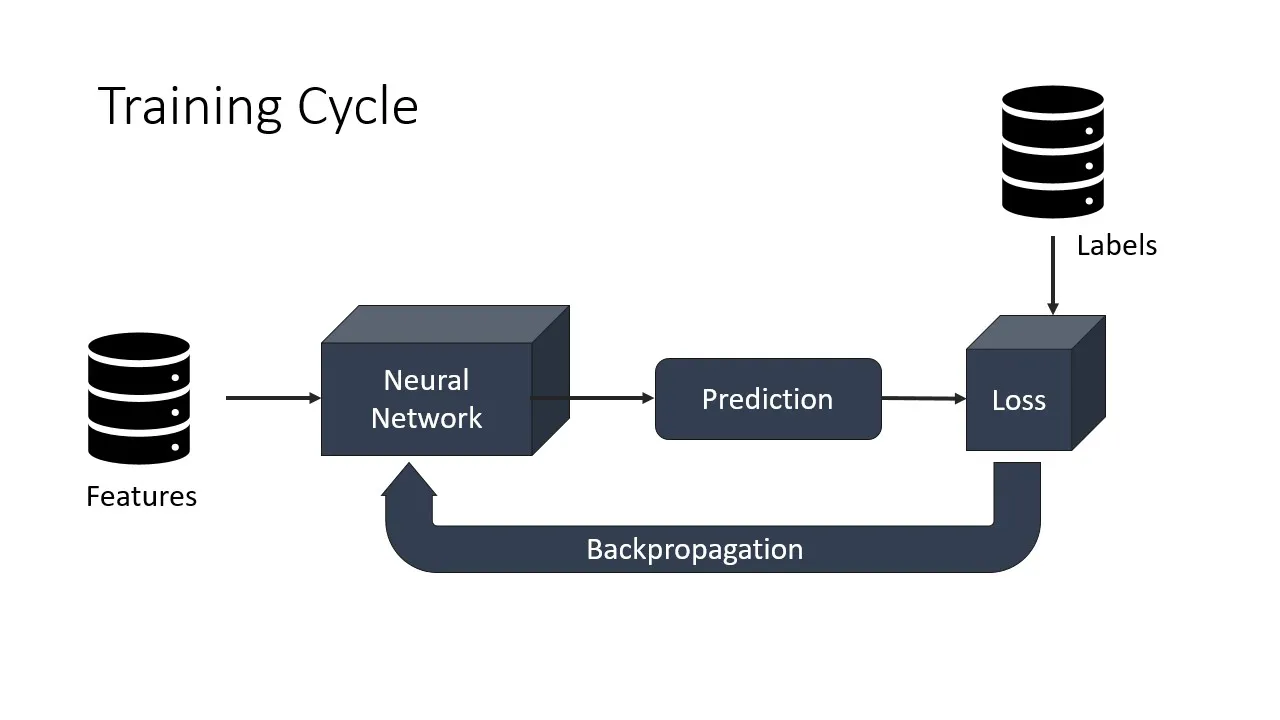

Per il ***teorema di approssimazione universale***, una rete neurale può approssimare qualsiasi funzione matematica continua. 

A differenza del Machine Learning classico, in cui ogni modello ha i propri iperparametri da gestire, una rete neruale descrive un'unica architettura di apprendimento caratterizzata da strategie di composizione diverse in base al problema.

I fattori che determinano una rete neurale sono:
- la selezione della funzione di attivazione
- la scelta del numero di livelli nascosti
- la scelta del numero di neuroni per livelli nascosti
- la scelta degli ottimizzatori
- la scelta dei valori con cui valorizzare gli iperparametri di addestramento


## 1 **Funzioni di attivazione**

Come abbiamo visto nell'introduzione alle reti neruli, per ogni neurone artificiale viene prima calcolata la somma ponderata dei valori di input e infine vine mappato l'output da una funzione di attivazione che ha il compito di:
- restringere i valori in un determinato range
- modellare la non linearità dei dati.


Di fatto, una rete neurale senza funzioni di attivazione sarebbe limitata alla stessa classe di problemi di una regressione lineare.

### 1.1 **Il problema dei gradineti che scompaiono o esplodono (vanishing and exploding gradients)**

Durante la **back-propagation**, ogni peso viene aggironato con il risultato della minimizzazione della funzione di costo attravesro la discesa del gradiente (le deriviate parziali della funzione di costo). 
Questo calcolo, distributio sulla profondità di una rete può portare a due diversi problemi:
- **vanishing gradients**: le derivate parizali tendono a valori sempre più prossimi allo zero causando il rallentamento dell'aggionrnamento dei pesi fino alla totale terminazione del neurone.

- **exploding gradients**: i valori derivati aumentano sempre di più andando ben oltre il valore a cui dovrebbero convergere.


Il primo medoto per evitare questi due problemi resta sicuramente quello di saper scegliere una funzione di costo per ogni livello nascosto della rete neurale.

### 1.2 **Guida alle funzioni di attivazione**

#### 1.2.1 Sigmoide



**Pro**
- Restringe i valori di uscita in un range tra 0 e 1
- Efficace esclusivamente per le classificazioni binarie

**Contro**
- Tende al problema del ***vanisghing gradient***, soprattuto se usata al di fuordi di un problema di classificazione binaria
- Computazionalmente costosa


**Tensorflow**

```python
layer = tf.keras.layers.Dense(300, activation=tf.keras.activations.sigmoid)
```

```python
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation="sigmoid"))
```



In [ ]:

def sigmoid_function_test():
  # X = tf.constant([-30, -44.0,-50, 12.0, 22.2, 50.3], dtype = tf.float32) # input
  X =  tf.constant([-30, -12.0, 0.0, 5.0, 25.0], dtype = tf.float32 )# input
  W = np.random.rand(5) # pesi
  B = 1.0 # bias

  # somma pesata
  weighted_sum = X * W + B


  sigmoid_x = tf.keras.activations.sigmoid(weighted_sum).numpy()


  plt.plot(X, color="red")
  plt.show()
  plt.plot(sigmoid_x)
  plt.show()

sigmoid_function_test()

#### 1.2.2 Softmax



**Pro**
- Restringe i valori di uscita in un range tra 0 e 1
- Efficace esclusivamente per le classificazioni multiple

**Contro**
- Computazionalmente molto costosa


**Tensorflow**



```python
layer = tf.keras.layers.Dense(300, activation=tf.keras.activations.softmax)
```


```python
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation="softmax"))
```


In [ ]:
def softmax_function_test():
  X = tf.random.normal(shape=(32, 2))# input
  W = np.random.rand(32, 2) # pesi
  B = 1.0 # bias

  # somma pesata
  weighted_sum = X * W + B


  softmax_x = tf.keras.activations.softmax(weighted_sum).numpy()

  plt.plot(X, 'o')
  plt.show()
  plt.plot(softmax_x, 'o')
  plt.show()




softmax_function_test()

#### 1.2.3 Tangente iperbolica



**Pro**
- Restringe i valori di uscita in un range tra - e 1
- Alternativa alla funzione sigmoide per la classificazione

**Contro**
- Tende al problema del ***vanisghing gradient***
- Computazionalmente costosa


**Tensorflow**



```python
layer = tf.keras.layers.Dense(300, activation=tf.keras.activations.tanh)
```


```python
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation="tanh"))
```


#### 1.2.3 Relu (rettificatore)



**Pro**
- Facile da calcolare
- Non causa probledi di scomparsa del gradiente


**Contro**
- Supporta solo valori positivi
- I valori negativi vengono settati a 0 causando lo spegnimento del neurone
- Causa problemi di espolosione del gradiente


**Tensorflow**



```python
layer = tf.keras.layers.Dense(300, activation=tf.keras.activations.relu)
```


```python
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation="relu"))
```


In [4]:

def relu_function_test(data):
  X = tf.constant(data, dtype = tf.float32) # input
  W = np.random.rand(len(data)) # pesi
  B = 1.0 # bias

  # somma pesata
  weighted_sum = X * W + B


  relu_x = tf.keras.activations.relu(weighted_sum).numpy()


  plt.plot(X, color="red")
  plt.show()
  plt.plot(relu_x)
  plt.show()


In [ ]:
relu_function_test([30, 44.0,50, 12.0, 22.2, 60.3])

In [ ]:
relu_function_test([-30, -44.0,-50, 12.0, 22.2, 50.3])

#### 1.2.3 Leaky Relu 



**Pro**
- Facile da calcolare
- Non causa probledi di scomparsa del gradiente
- Supporta anche valori di input negativi evitando il problema ***dying ReLU***


**Contro**
- Causa problemi di espolosione del gradiente


**Tensorflow**



```python
output = keras.layers.Dense(units=90, activation=keras.layers.LeakyReLU(alpha=0.01))
```




In [ ]:

def leaky_relu_function_test(data):
  X = tf.constant(data, dtype = tf.float32) # input
  W = np.random.rand(len(data)) # pesi
  B = 1.0 # bias

  # somma pesata
  weighted_sum = X * W + B

  layer = tf.keras.layers.LeakyReLU(0.1)
  leaky_relu_x = layer(data)


  plt.plot(X, color="red")
  plt.show()
  plt.plot(leaky_relu_x)
  plt.show()


leaky_relu_function_test([-30.0, -44.0,-50.0, 12.0, 0.1, 22.2, 50.3])  


#### 1.2.4 Swish



**Pro**

- Non causa probledi di scomparsa del gradiente
- Alternativa alla ***relu***, converge più velocemente su dati complessi


**Contro**
- Computazionalmente costoso


**Tensorflow**



```python
layer = tf.keras.layers.Dense(300, activation=tf.keras.activations.swish)
```


```python
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation="swish"))
```


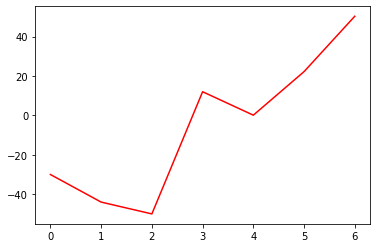

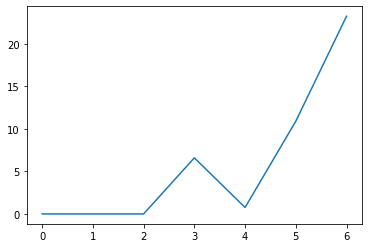

In [8]:

def swish_function_test(data):
  X = tf.constant(data, dtype = tf.float32) # input
  W = np.random.rand(len(data)) # pesi
  B = 1.0 # bias

  # somma pesata
  weighted_sum = X * W + B


  swish_x = tf.keras.activations.swish(weighted_sum).numpy()


  plt.plot(X, color="red")
  plt.show()
  plt.plot(swish_x)
  plt.show()

swish_function_test([-30.0, -44.0,-50.0, 12.0, 0.1, 22.2, 50.3])  


#### 1.2.5 Selu (Unità lineare esponenziale scalata)



**Pro**

- Non causa probledi di scomparsa del gradiente
- Alternativa alla ***relu***, converge più velocemente anche rispetto alle altre funzioni di attivazione



**Tensorflow**



```python
layer = tf.keras.layers.Dense(300, activation=tf.keras.activations.selu)
```


```python
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation="selu"))
```


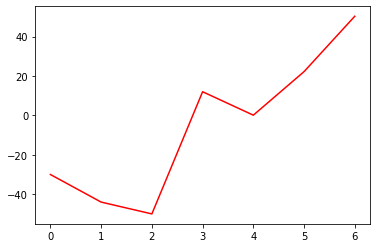

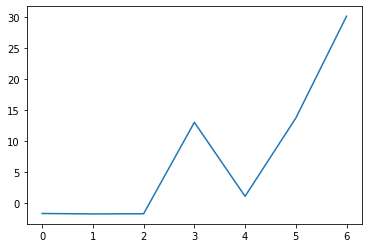

In [9]:

def selu_function_test(data):
  X = tf.constant(data, dtype = tf.float32) # input
  W = np.random.rand(len(data)) # pesi
  B = 1.0 # bias

  # somma pesata
  weighted_sum = X * W + B


  selu_x = tf.keras.activations.selu(weighted_sum).numpy()


  plt.plot(X, color="red")
  plt.show()
  plt.plot(selu_x)
  plt.show()

selu_function_test([-30.0, -44.0,-50.0, 12.0, 0.1, 22.2, 50.3])  


#### 1.2.6 Linear



**Pro**

- Da usare nello strato finale nei problemi di regressione




**Tensorflow**



```python
layer = tf.keras.layers.Dense(300, activation=tf.keras.activations.linear)
```


```python
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation="linear"))
```


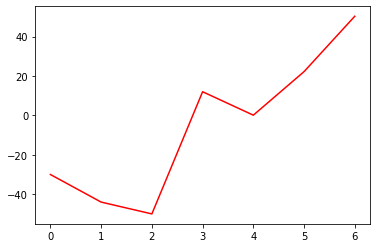

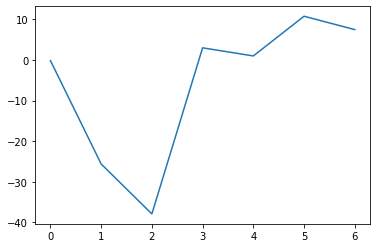

In [10]:

def linear_function_test(data):
  X = tf.constant(data, dtype = tf.float32) # input
  W = np.random.rand(len(data)) # pesi
  B = 1.0 # bias

  # somma pesata
  weighted_sum = X * W + B


  linear_x = tf.keras.activations.linear(weighted_sum).numpy()


  plt.plot(X, color="red")
  plt.show()
  plt.plot(linear_x)
  plt.show()

linear_function_test([-30.0, -44.0,-50.0, 12.0, 0.1, 22.2, 50.3])  


### 1.3 **Scelta delle funzioni di attivazione**

- **Funzioni per i livelli nascosti**
  - *relu*
  - *leaky relu (quando relu degenera in **dying relu**)*
  - *swish (per reti profonde con molti livelli)*

- **Strato finale (prima dell'output)**
  - *lineare  (problemi di regressione)*
  - *sigmoide (problemi di classificazione binaria)*
  - *tangente iperbolica (problemi di classificazione binaria)*
  - *softmax (problemi di classificazione multipla)*

## 2 **Neuroni e livelli nascosti**

### 2.1 **Quanti livelli nascosti?**


- Se i dati mostrano una relazione lineare non hanno bisogno di livelli nascosti.

- Se le dimensioni dei dati non sono molto grandi, spesso si raggiungono già ottime percentuali di accuratezza partendo da un singolo livello.

- In presenza di dati particolarmente complessi, conviene partire da 2/3 livelli per poi testarne gradualmente l'aggiunta di nuovi. Il limite viene dato dal fatto che se si eccede nel numero di livelli il modello va in overfitting.




### 2.2 **Quanti neuroni per ogni livello nascosto?**



  - Un valore di partenza può essere calcolato:
    - sommando la dimensione del layer di output con i 2/3 della dimensione dei valori di input.
    - sottraendo la dimensione dei layer di output alla dimensione dei valori di input.
    - testare valori crescenti o decrescenti a partire dalla dimensione dell'input (indicato per dataset non molto grandi)

  - Un numero insufficiente di neuroni produce underfitting.

  - Un livello troppo alto produce overfitting.

Un approccio descritto da Vincent Vanhoucke (Google) si basa sulla "reogla dei pantaloni elastici" (stretch pants rules):

"*Piuttosto che perdere tempo cercando la taglia di pantaloni adatti, è meglio partire da un pantalone elasticizzato sufficientemente grande, per poi restringelo fino alla taglia giusta.*"

## 3 **La scelta degli ottimizzatori**


Uno degli aspetti più importanti nella costruzione di una rete neurale è la selezione degli iperparametri che influiscono direttamente o indiirettamente sulle fasi di forward e  back-propagation.

- Ottimizzazatori della funzione di costo.
- Ottimizzatori della discesa del gradiente

### 3.1 **Funzioni di costo** 

#### 3.1.1 Binary Cross-Entropy Loss

Già vista nella Regressione Logistica, viene usata in caso di classificazione binaria quando l'output finale è rappresentato da 0 o 1.

```python
model.compile(loss="binary_crossentropy")
```

```python
loss = tf.keras.losses.BinaryCrossentropy()
```



#### 3.1.2 Categorical Cross-Entropy Loss

Funzione di costo ottimizzata per problemi di classificazione multipla.
Spesso utilizzata insieme a trasformatori come **one-hot-encoding**.

```python
model.compile(loss="categorical_crossentropy")
```

```python
loss = tf.keras.losses.CategoricalCrossentropy()
```



#### 3.1.3 Sparse Categorical Cross-Entropy Loss

Stessa finalità della *Categorical Cross Entropy*, viene utilizzata quando il target è un insieme di interi (es. pixels).



```python
model.compile(loss="sparse_categorical_crossentropy")
```

```python
loss = tf.keras.losses.SparseCategoricalCrossentropy()
```



#### 3.1.4 Means Squared Error (MSE)

Già vista nei problemi di regressione, stima l'errore che commettiamo ogni volta che un modello predice un determinato valore.





```python
model.compile(loss="mse")
```

```python
loss = tf.keras.losses.MeanSquaredError()
```



### 3.2 **Ottimizzatori** 

#### 3.2.1 SGD Optimizer (Stochastic Gradient Descent)

L'algoritmo di discesa stocastica del gradiente è una semplificazione dell'algoritmo di discesa del gradiente. Non calcola il gradiente su tutti i valori di input, ma di un campione scelto casualmente.

```python
model.compile(optimizer="sgd")
```

```python
tf.keras.optimizers.SGD(learning_rate=0.001) 
```



#### 3.2.2 Adam Optimizer (Adaptive Moment Estimation)

Il **momento** è un termine calcolato a partire dai gradienti precedenti aggiunto come parametro al calcolo del gradiente corrente.

L'ottimizzazioe Adam prende questo concetto e lo usa appunto per velocizzare il calcolo del gradiente corrente a partire da quelli già calcolati.

```python
model.compile(optimizer="adam")
```

```python
tf.keras.optimizers.Adam(learning_rate=0.001) 
```



#### 3.2.3 RMSprop Optimizer (Root Mean Square Propagation)

Potremmo definire questo tipo di approccio come un'estensione della SGD resa adattiva dall'applicazione del concetto di **momentum**.

```python
model.compile(optimizer="rmsprop")
```

```python
tf.keras.optimizers.experimental.RMSprop(learning_rate=0.001) 
```



## 4 **Iperparametri d'addestramento**


- **epochs**: è il ciclo completo che compie una rete neruale tra forward e back propagation.
Qual'è il numero ottimael di epoche 
- **batch size:** non è possibile passare un intero dataset ad una rete neruale senza avere problemi di efficienza. Una soluzione consiste nel dividere un set di training in sezioni di dimensione più piccola (batch), in modo da ottimizzare il processo.
- **iterations:** è il numero di sezioni da processare in un epoca.


Non esiste un metodo riconsosciuto per stabilire quali siano i valori migliori per valorizzare questi iperparametri.

Una soluzione potrebbe essere quella di partire da valori molto grandi e osservare quando il modello va in overfitting.

### 4.1 **Interpretazione di una curva di apprendimento** 
**fonte**: https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

#### 4.1.1 Underfit learning curve

- Entrambe le curve tendono a restare pitte o a decrescere all'aumentare delle epoche

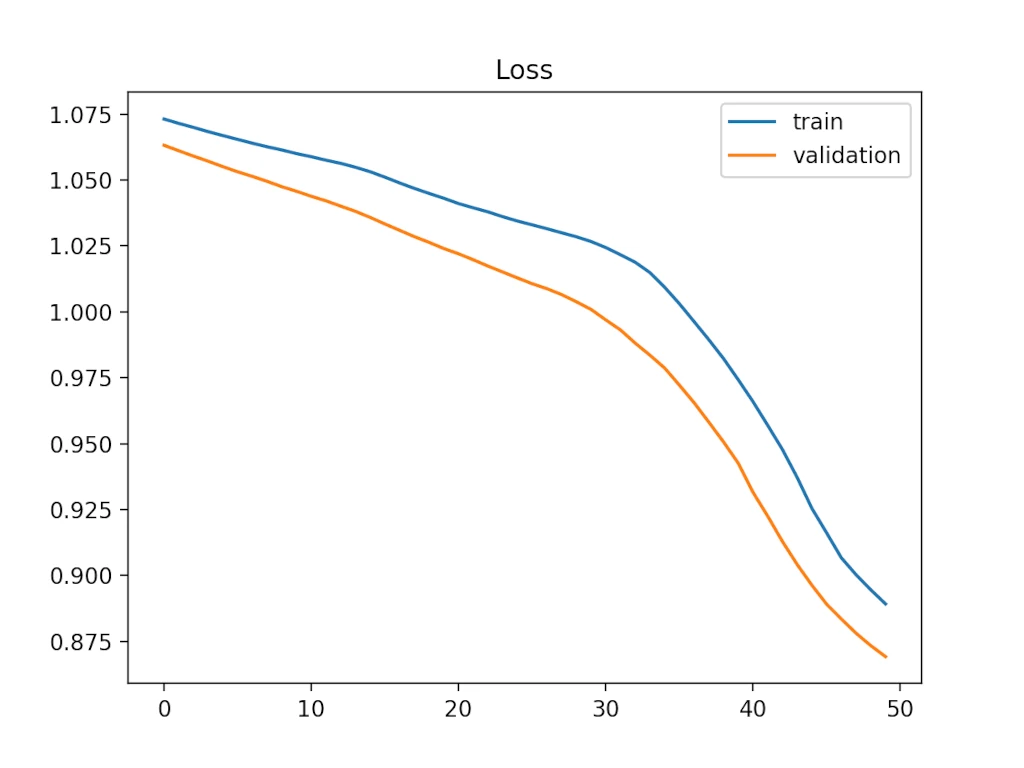

#### 4.1.2 Overfit learning curve

- la curva di training tende a decrescere con l'avanzaer delle epoche.
- la curva di validazione decresce per poi crescere fino a superare la curva di training

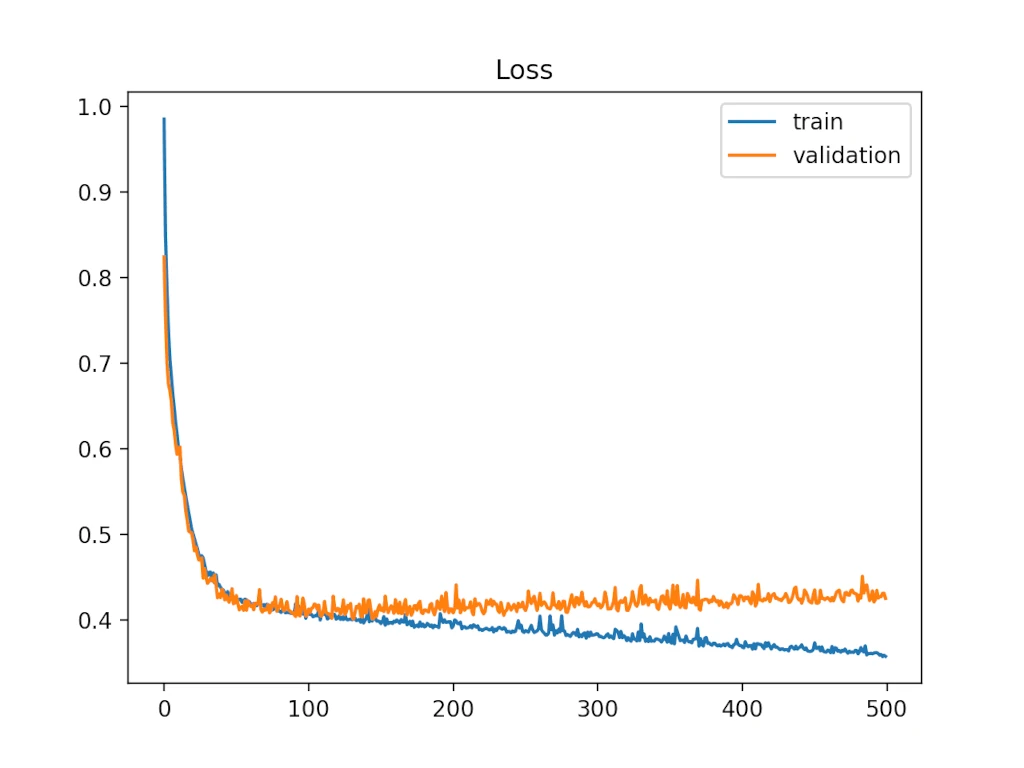

#### 4.1.2 Good learning curve

- la curva di training tende a decrescere fino a stabilizzarsi.
- la curva di validazione decresce fino a stabilizzaresi mantenendo una distanza minima dalla curva di training.

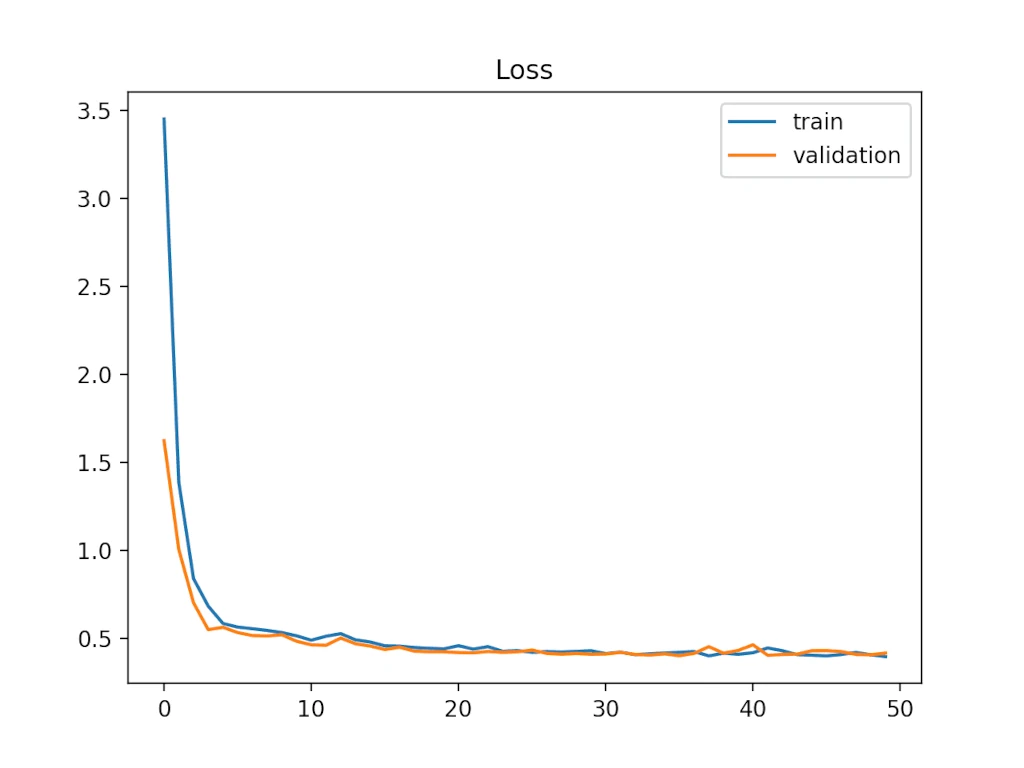

# **ESEMPIO**

In [11]:
from sklearn.impute import SimpleImputer




df = pd.read_csv("https://raw.githubusercontent.com/FabioGagliardiIts/ai_ml_python/main/cheat_sheets/boston_housing.csv")
df = df.drop(['Unnamed: 0','CHAS', 'RAD', 'B'], axis = 1) 

imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
for column in df:
  if df[column].isnull().values.any():
    tmp = df[column].to_numpy()
    # imputazione dei valori mancanti
    df[column] = imp_mean.fit_transform(tmp)

display(df)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,6.48,22.0


In [12]:
X = df.drop("MEDV", axis=1).values
Y = df["MEDV"].values


In [34]:

def plot_training_history(history):
  # loss
  df_loss = pd.DataFrame()
  df_loss['train_loss'] = history.history['loss']
  df_loss['val_loss'] = history.history['val_loss']
  df_loss.plot(figsize=(16,12))
  plt.grid(True)
  plt.title("LOSS")
  plt.xlabel("epoch")
  plt.ylabel("loss")
  plt.show()
   # mean absolute error
  df_error = pd.DataFrame()
  df_error['train_mae'] = history.history['mae']
  df_error['val_mae'] = history.history['val_mae']
  df_error.plot(figsize=(16,12))
  plt.grid(True)
  plt.title("ERROR")
  plt.xlabel("epoch")
  plt.ylabel("mae")
  plt.show()



def compile_test_1(x, y):
  # split
  x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
  
  # scale
  scaler = StandardScaler()
  scaler.fit(x_train)
  x_train = scaler.transform(x_train)
  x_val   = scaler.transform(x_val)

  # traning model
  model = keras.models.Sequential(name="test_1")
  
  # layers
  model.add(keras.layers.Dense(100, activation="relu", name="hidden_1"))
  model.add(keras.layers.Dense(100, activation="relu", name="hidden_2"))
  model.add(keras.layers.Dense(1, activation="linear", name="output"))


  # compile
  history = model.compile(optimizer="rmsprop", # root mean squard propagation
                          loss="mse",          # means sqared error
                          metrics=["mae"])     # mean absolute error

  # training
  history = model.fit(x_train, y_train,
                      epochs=300, 
                      validation_data=(x_val,  y_val))
  
  model.evaluate(x_val, y_val)

  return history
  
history = compile_test_1(X, Y)


Epoch 1/300
13/13 [==============================] - 1s 17ms/step - loss: 514.5225 - mae: 20.7910 - val_loss: 387.0197 - val_mae: 17.5524
Epoch 2/300
13/13 [==============================] - 0s 6ms/step - loss: 345.8953 - mae: 16.5507 - val_loss: 229.3387 - val_mae: 12.8808
Epoch 3/300
13/13 [==============================] - 0s 5ms/step - loss: 194.1790 - mae: 11.8046 - val_loss: 122.3851 - val_mae: 8.8110
Epoch 4/300
13/13 [==============================] - 0s 5ms/step - loss: 103.3515 - mae: 8.2503 - val_loss: 72.0514 - val_mae: 6.6391
Epoch 5/300
13/13 [==============================] - 0s 5ms/step - loss: 62.4914 - mae: 6.2346 - val_loss: 46.5843 - val_mae: 5.4311
Epoch 6/300
13/13 [==============================] - 0s 4ms/step - loss: 42.6772 - mae: 4.9307 - val_loss: 32.4575 - val_mae: 4.5251
Epoch 7/300
13/13 [==============================] - 0s 6ms/step - loss: 31.5517 - mae: 4.0747 - val_loss: 23.9182 - val_mae: 3.8358
Epoch 8/300
13/13 [==============================] - 0s 

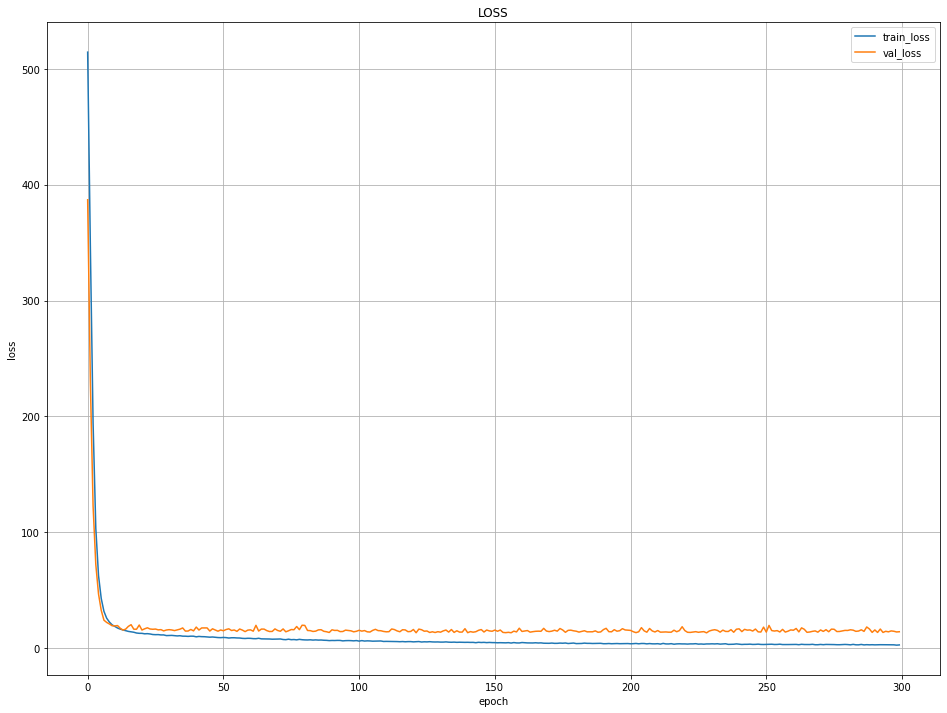

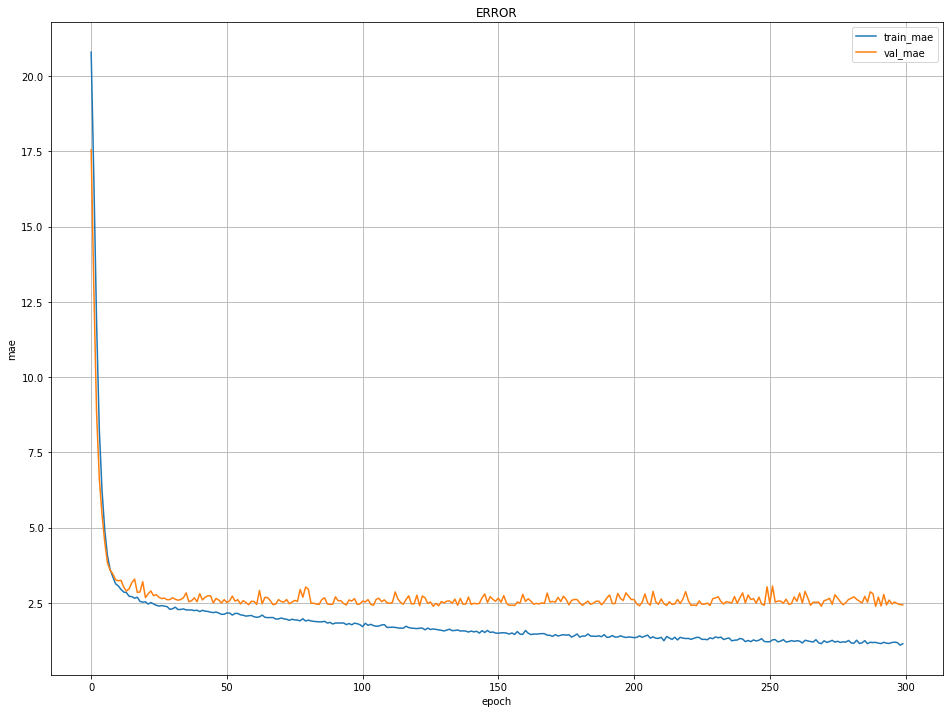

In [35]:
plot_training_history(history)